<a href="https://colab.research.google.com/github/nsthomp5/MAT422/blob/main/MAT_422_HW_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Name: Nicholas Thompson
# ID: 1223100502
# Class: MAT 422
# Assignment: HW 4.2

In [62]:
!pip install networkx

In [63]:
import networkx as nx # for graphs
import numpy as np # for matrices

Section 4.2 is about graphs and graph modeling. Graphs in this case refer to the visual of "nodes," represented as singular points containing some entry, with "edges," which connect nodes to one another. Graphs are meant to depict relationships between variables. They can be directed, where edges become vectors to showcase a direct relationship between nodes, and both distance and node size can also be used to convey various characteristics of the relationships between the nodes. Directed Acyclic Graphs are useful in Causal Modeling, for instance, where directed edges showcase cause-and-effect between nodes. The "acyclic" part refers to the graph having no endless paths of directed edges. Example 1 shows an undirected graph. Graphs can also be represented with loops instead of edges, where a direct two-way relationship between nodes is depicted.

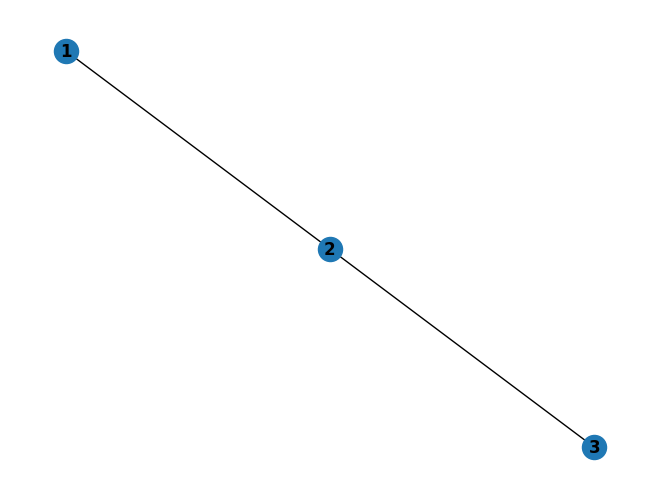

In [64]:
# 4.2 Graph and Graph Modeling
# Example 1: Graph

G = nx.Graph() # create graph

G.add_node(1) # add a node

G.add_nodes_from([2, 3])  # add multiple nodes

G.add_edge(1, 2) # add edge between nodes 1 and 2
e = (2, 3) # define an edge
G.add_edge(*e) # add the defined edge

nx.draw(G, with_labels=True, font_weight='bold') # draw the graph

Example 2 shows a Directed Acyclic Graph showcasing causal relationships between baseball stats reflective of specific events. As you can see, all causal paths end at OPS. Each node contains a string rather than a number, showing that interacting with the graph does not depend on the specific entries of each node.

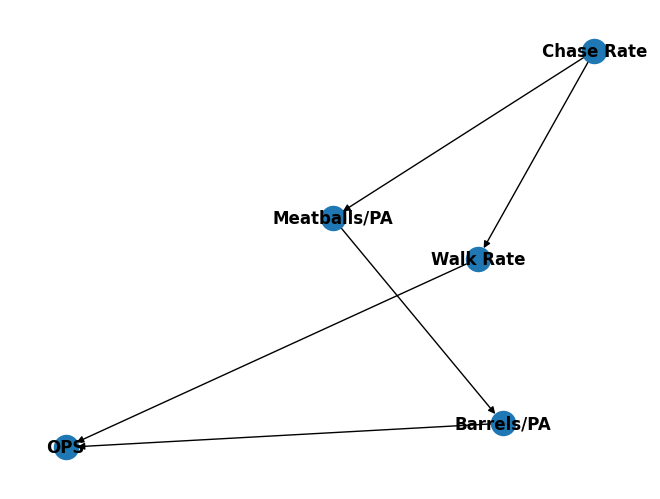

In [65]:
# Example 2: Directed Acyclic Graph

DG = nx.DiGraph() # created directed graph

DG.add_nodes_from(["Chase Rate", "Walk Rate", "Meatballs/PA", "Barrels/PA", "OPS"]) # nodes with strings

DG.add_edge("Chase Rate", "Walk Rate") # causal relationships
DG.add_edge("Meatballs/PA", "Barrels/PA")
DG.add_edge("Chase Rate", "Meatballs/PA")
DG.add_edge("Walk Rate", "OPS")
DG.add_edge("Barrels/PA", "OPS")

nx.draw(DG, with_labels=True, font_weight='bold')
#

The Laplacian Matrix represents a graph as a matrix. Its entries are based on how many edges each node is connected to, as well as which nodes connect to one another by edges. The Laplacian Matrix's applications boil down to extracting lower-dimensional information from a graph, such as spanning trees, sparsest cuts, or embeddings, where specific important information about the edges of a graph are represented in a more usable form.

In [66]:
# Example 3: Laplacian Matrix

G.add_nodes_from([1,2,3,4,5,6])

G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)

D = np.zeros([6,6]) + np.diag(np.array(list(dict(nx.degree(G)).values()))) # calls degree function for degree values on diagonal

def adjacency_matrix(G, edges):
  m = np.zeros([len(G), len(G)]) # square matrix of graph length dimensions
  for edge in edges:
        u, v = edge # node indexes
        m[u-1][v-1] = 1 # adds a 1 where nodes have an edge, subtracts 1 to match indexes
        m[v-1][u-1] = 1
  return m

A = adjacency_matrix(G, G.edges())

L = D - A # laplacian matrix

print(L)

[[ 1. -1.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]


The Incidence Matrix depicts the edges of a graph as a binary system, where the row indexes correspond to the nodes and the column indexes correspond to the edges, and each row-column entry describes the incidence of edges at nodes. For a directed graph, directed edges leaving a node is depicted as -1. Example 4 shows the incidence matrix for both an undirected graph and a directed graph.

In [67]:
# Example 4: Incidence Matrix

IMG = nx.incidence_matrix(G, oriented=False).toarray() # undirected graph incidence matrix

print(IMG)

IMDG = nx.incidence_matrix(DG, oriented=True).toarray() # directed graph incidence matrix

print("\n")
print(IMDG)

[[1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


[[-1. -1.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.]
 [ 0.  1.  0. -1.  0.]
 [ 0.  0.  0.  1. -1.]
 [ 0.  0.  1.  0.  1.]]
